# 0. Combining plotting with live data from a web server

You need to create a combination of:
* The automatically updating plot with a time delay as done in `Session02-04-Matplotlib.ipynb`, Section 4, with
* The functionality or requesting (`GET`) and posting (`POST`) data to a web server.

## Preparation

A *very simple* REST web server is provided for you in `Session03-02-simple-json-http-server.ipynb`.
This implementation should not require any modification, but if you have problems, please ask for help.

Before continuing, open `Session03-02-simple-json-http-server.ipynb` into another tab in `Jupyter Lab` and *execute the notebook*.
It should only print `Hello. Serving at port 8891` and wait doing nothing. This is *normal* since out server is just waiting to respond to requests, which we have not yet made.

The server should be running on `PORT` 8891. You can configure this port in `Session03-02-simple-json-http-server.ipynb` by modifying the value of the `PORT` variable.
Make sure to use the same port in the requests as in the server.

## Context

This REST web server provides simple functionality related to generating *random integers* in a given *range*.

The API of the server is:

### 1. `GET` `/random_range`
Returns the current random integer *range* (should be \[1, 10\] by default).

The JSON response content is of the form:
```json
{
  'from_n': 1,
  'to_n': 10
}
```
but the values `1` and `10` may be different.

With the default parameters the URL you need to provide to the `requests` library is of the form: `'http://127.0.0.1:8891/random_range'`


### 2. `GET` `/random_number`
Returns a new generated random integer *number* each time.

The JSON response content is of the form:
```json
{
  'number': 7
}
```
but the value `7` may be different and should usually change from request to request.

With the default parameters the URL you need to provide to the `requests` library is of the form: `'http://127.0.0.1:8891/random_number'`

### 3. `POST` `/random_range`
Takes a new random integer range as input, sets it to be used in future requests and returns the new current random integer *range*.

The JSON request *body* content is of the form:
```json
{
  'from_n': 5,
  'to_n': 100
}
```

The JSON response content is of the form:
```json
{
  'from_n': 5,
  'to_n': 100
}
```
but the values `5` and `100` may be different. Normally, the provided range as input should be the same as the one returned, but if an error has occurred the new range may not have been updated.
Check the response to make sure it is up-to-date.

With the default parameters the URL you need to provide to the `requests` library is of the form: `'http://127.0.0.1:8891/random_range'`

# 1. Problem steps *without plotting*

1. Make one `POST` request to set the random range to \[1, 10\].
2. Make one `GET` request to get the current range. Print the current range.
3. Make 20 `GET` requests to get one random integer (each) in the \[1, 10\] range. Print the random integers one by one, as they come from the server.
4. Make one `POST` request to set the random range to \[41, 50\]. Check that these are the values returned also. In other words validate that the new range is indeed \[41, 50\].
5. Make 20 `GET` requests to get one random integer (each) in the \[41, 50\] range. Print the random integers one by one, as they come from the server.



In [16]:
PORT = 8891

import requests

#1. Make one `POST` request to set the random range to \[1, 10\].
url = f'http://127.0.0.1:{PORT}/random_range'

data = {
    'from_n': 1,
    'to_n': 10
}

reponse =  requests.post(url, json=data)

if reponse.status_code == 200 :
    print("Post range", reponse.json())

#2. Make one `GET` request to get the current range. Print the current range.
reponse = requests.get(url)
if reponse.status_code == 200 :
    print("Current Range", reponse.json())


#3. Make 20 `GET` requests to get one random integer (each) in the \[1, 10\] range. Print the random integers one by one, as they come from the server.
url = f'http://127.0.0.1:{PORT}/random_number'
for i in range(20):
    reponse = requests.get(url)
    if reponse.status_code == 200:
        print(f"n°{i} Ramdom number :", reponse.json()['number'])
#4. Make one `POST` request to set the random range to \[41, 50\]. Check that these are the values returned also. In other words validate that the new range is indeed \[41, 50\].
url = f'http://127.0.0.1:{PORT}/random_range'

data = {
    'from_n': 41,
    'to_n': 50
}

reponse =  requests.post(url, json=data)

if reponse.status_code == 200 :
    print("Post range", reponse.json())


#5. Make 20 `GET` requests to get one random integer (each) in the \[41, 50\] range. Print the random integers one by one, as they come from the server.
url = f'http://127.0.0.1:{PORT}/random_number'
for i in range(20):
    reponse = requests.get(url)
    if reponse.status_code == 200:
        print(f"n°{i} Ramdom number :", reponse.json()['number'])




Post range {'from_n': 1, 'to_n': 100}
Current Range {'from_n': 1, 'to_n': 100}
n°0 Ramdom number : 28
n°1 Ramdom number : 73
n°2 Ramdom number : 59
n°3 Ramdom number : 22
n°4 Ramdom number : 100
n°5 Ramdom number : 91
n°6 Ramdom number : 80
n°7 Ramdom number : 66
n°8 Ramdom number : 5
n°9 Ramdom number : 49
n°10 Ramdom number : 26
n°11 Ramdom number : 45
n°12 Ramdom number : 13
n°13 Ramdom number : 27
n°14 Ramdom number : 74
n°15 Ramdom number : 87
n°16 Ramdom number : 56
n°17 Ramdom number : 76
n°18 Ramdom number : 25
n°19 Ramdom number : 64
Post range {'from_n': 41, 'to_n': 50}
n°0 Ramdom number : 42
n°1 Ramdom number : 47
n°2 Ramdom number : 45
n°3 Ramdom number : 49
n°4 Ramdom number : 48
n°5 Ramdom number : 41
n°6 Ramdom number : 46
n°7 Ramdom number : 50
n°8 Ramdom number : 47
n°9 Ramdom number : 45
n°10 Ramdom number : 41
n°11 Ramdom number : 43
n°12 Ramdom number : 44
n°13 Ramdom number : 46
n°14 Ramdom number : 50
n°15 Ramdom number : 43
n°16 Ramdom number : 46
n°17 Ramdom num

# 2. Problem steps *with plotting*

This works similarly to before in 1.

1. Make one `POST` request to set the random range to \[1, 10\].
2. Make 20 `GET` requests to get random integers in the \[1, 10\] range.
  * In the for loop (provided, also as a solution to `Session02-04-Matplotlib.ipynb`, Section 4) plot the random numbers, with `x` being the incrementing order of the requesting number (0, 1, 2, ..., 19) and `y` being each time the corresponding generated random number.
4. Make one `POST` request to set the random range to \[41, 50\].
5. Make 20 `GET` requests to get random integers in the new range.
  * In the for loop (provided again) plot the random numbers, with `x` being the incrementing order of the requesting number (20, 21, 22, ..., 39) and `y` being each time the corresponding generated random number.

In the following for loop, one random value should be requested in each execution of the `get_next_point` function and returned by it.

Create a simple line plot, but that **automatically updates** as every new value is generated.

Wait/delay 0.2 seconds between each data point update to create an animation.

Expect something like this as a result:

![Example](Session03-01-requests-json-Section-2.gif)

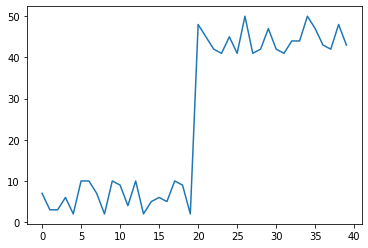

In [21]:
PORT = 8891

import requests

import time
import matplotlib.pyplot as plt
from IPython.display import clear_output



# Provided partially implemented: 
def get_next_point():
    url = f'http://127.0.0.1:{PORT}/random_number'
    reponse = requests.get(url)
    if reponse.status_code == 200 :
        return reponse.json()["number"]
    return None

# Provided already implemented: List holding the x values
data_x = []
# Provided already implemented: List holding the y values
data_y = []


# TODO: Set the range to [1, 10]
url = f'http://127.0.0.1:{PORT}/random_range'

data = {
    'from_n': 1,
    'to_n': 10
}

reponse =  requests.post(url, json=data)

if reponse.status_code == 200 :
    print("Post range", reponse.json())

# Provided already implemented: make 20 iterations, getting a random number each time, and plotting a new plot with updated values.
for x in range(0, 20):
    data_x.append(x)  # Add the current x to the list
    y = get_next_point() # Request a new random value and store in y
    data_y.append(y) # Add the current y to the list

    clear_output(wait=True) # Clear / remove whatever was already plotted before
    plt.plot(data_x, data_y) # Re-plot the data with the new added values in the list
    plt.show() # Make sure to display the new plot, to make it visible
    time.sleep(0.2) # Wait 0.2 seconds before the next request

# TODO: Set the range to [41, 50]    
url = f'http://127.0.0.1:{PORT}/random_range'

data = {
    'from_n': 41,
    'to_n': 50
}

reponse =  requests.post(url, json=data)

if reponse.status_code == 200 :
    print("Post range", reponse.json())

# Provided already implemented: make 20 iterations, getting a random number each time, and plotting a new plot with updated values.
for x in range(20, 40):
    data_x.append(x)  # Add the current x to the list
    y = get_next_point() # Request a new random value and store in y
    data_y.append(y) # Add the current y to the list

    clear_output(wait=True) # Clear / remove whatever was already plotted before
    plt.plot(data_x, data_y) # Re-plot the data with the new added values in the list
    plt.show() # Make sure to display the new plot, to make it visible
    time.sleep(0.2) # Wait 0.2 seconds before the next request
